### import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### read data in 'fake_reg.csv'

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### explore dataset

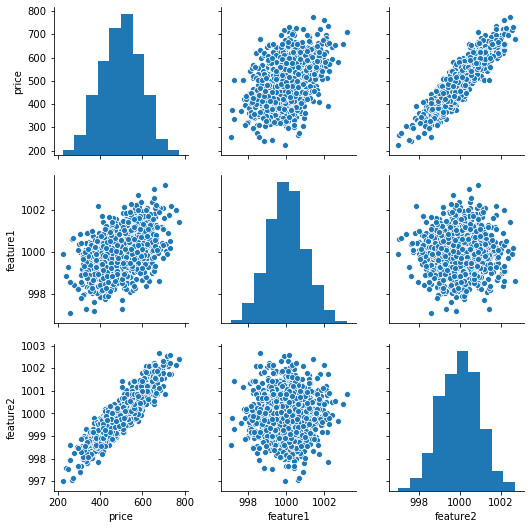

In [4]:
sns.pairplot(df)

### split data into train/test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### verify your split

In [9]:
X_train.shape

(700, 2)

In [37]:
y_test.shape

(300,)

### scale your data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = scaler.transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

### verify scaling

In [16]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [17]:
X_train.max()

1.0

In [18]:
X_train.min()

0.0

##  ===TensorFlow===

### import

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### create a sequential model for the above regression data, with 3 layers+ output

In [20]:
model = Sequential()

#add layers
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

#add output
model.add(Dense(1))

#compile
model.compile(opetimizer='rmsprop',loss='mse')

### train model with above regression data, 250 epochs

In [21]:
model.fit(X_train,y_train,epochs=250)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256723.1054
Epoch 2/250
700/700 [==============================] - 0s 31us/sample - loss: 256595.9374
Epoch 3/250
700/700 [==============================] - 0s 30us/sample - loss: 256458.1578
Epoch 4/250
700/700 [==============================] - 0s 33us/sample - loss: 256295.7536
Epoch 5/250
700/700 [==============================] - 0s 31us/sample - loss: 256109.5212
Epoch 6/250
700/700 [==============================] - 0s 30us/sample - loss: 255899.7493
Epoch 7/250
700/700 [==============================] - 0s 30us/sample - loss: 255662.7753
Epoch 8/250
700/700 [==============================] - 0s 30us/sample - loss: 255385.1961
Epoch 9/250
700/700 [==============================] - 0s 31us/sample - loss: 255061.5336
Epoch 10/250
700/700 [==============================] - 0s 31us/sample - loss: 254693.2260
Epoch 11/250
700/700 [==============================] - 0s 30us/sample - loss: 

700/700 [==============================] - 0s 31us/sample - loss: 1041.2132
Epoch 92/250
700/700 [==============================] - 0s 30us/sample - loss: 1011.4540
Epoch 93/250
700/700 [==============================] - 0s 31us/sample - loss: 988.6461
Epoch 94/250
700/700 [==============================] - 0s 31us/sample - loss: 962.7520
Epoch 95/250
700/700 [==============================] - 0s 30us/sample - loss: 938.7992
Epoch 96/250
700/700 [==============================] - 0s 30us/sample - loss: 911.8403
Epoch 97/250
700/700 [==============================] - 0s 37us/sample - loss: 887.6355
Epoch 98/250
700/700 [==============================] - 0s 31us/sample - loss: 862.8711
Epoch 99/250
700/700 [==============================] - 0s 30us/sample - loss: 836.1420
Epoch 100/250
700/700 [==============================] - 0s 30us/sample - loss: 810.2998
Epoch 101/250
700/700 [==============================] - 0s 30us/sample - loss: 784.8234
Epoch 102/250
700/700 [==================

700/700 [==============================] - 0s 30us/sample - loss: 24.6236
Epoch 184/250
700/700 [==============================] - 0s 33us/sample - loss: 24.7077
Epoch 185/250
700/700 [==============================] - 0s 29us/sample - loss: 24.1121
Epoch 186/250
700/700 [==============================] - 0s 30us/sample - loss: 24.5269
Epoch 187/250
700/700 [==============================] - 0s 30us/sample - loss: 24.3723
Epoch 188/250
700/700 [==============================] - 0s 31us/sample - loss: 24.3552
Epoch 189/250
700/700 [==============================] - 0s 31us/sample - loss: 24.6297
Epoch 190/250
700/700 [==============================] - 0s 30us/sample - loss: 24.7393
Epoch 191/250
700/700 [==============================] - 0s 31us/sample - loss: 24.6844
Epoch 192/250
700/700 [==============================] - 0s 31us/sample - loss: 24.2464
Epoch 193/250
700/700 [==============================] - 0s 30us/sample - loss: 24.3466
Epoch 194/250
700/700 [=======================

### plot training history for loss

In [22]:
df_loss = pd.DataFrame(model.history.history)

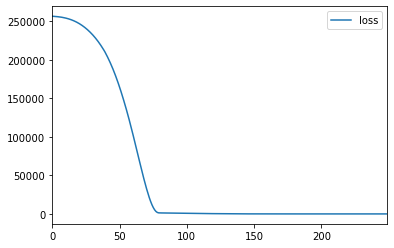

In [23]:
df_loss.plot()

##  ===Evaluate===

### evaluate your train/test results

In [25]:
test_score = model.evaluate(X_test,y_test,verbose=0)
test_score

25.802352549235025

### plot actual vs predict 

In [27]:
y_pred = model.predict(X_test)
y_pred

array([[405.89856],
       [624.5567 ],
       [593.08826],
       [573.1516 ],
       [367.16135],
       [580.1147 ],
       [515.8749 ],
       [459.81393],
       [550.1275 ],
       [448.20383],
       [612.7808 ],
       [549.8152 ],
       [419.73526],
       [409.48727],
       [652.3023 ],
       [437.9658 ],
       [509.24734],
       [661.0241 ],
       [663.6769 ],
       [566.44293],
       [334.70786],
       [445.5173 ],
       [383.09595],
       [379.31393],
       [567.50653],
       [611.5897 ],
       [533.2389 ],
       [428.51074],
       [656.5263 ],
       [414.70374],
       [443.3119 ],
       [485.88635],
       [439.0848 ],
       [682.97864],
       [425.39792],
       [418.32196],
       [502.70847],
       [551.3555 ],
       [510.54443],
       [395.95554],
       [619.59766],
       [417.25623],
       [605.4297 ],
       [446.63937],
       [502.77933],
       [582.6462 ],
       [670.09705],
       [491.16803],
       [319.02213],
       [486.1872 ],


In [29]:
y_pred.shape

(300, 1)

In [30]:
y_test.shape

(300,)

In [31]:
y_pred = pd.Series(y_pred.reshape(300,))

In [32]:
y_pred.shape

(300,)

In [40]:
pred_df = pd.DataFrame(y_test,columns=['y_test'])

In [41]:
pred_df = pd.concat([pred_df,y_pred],axis=1)

In [42]:
pred_df.head()

,y_test,0
0,402.296319,405.898560
1,624.156198,624.556702
2,582.455066,593.088257
3,578.588606,573.151611
4,371.224104,367.161346


In [43]:
pred_df.columns = ['y_test','pred_test']
pred_df

,y_test,pred_test
0,402.296319,405.898560
1,624.156198,624.556702
2,582.455066,593.088257
3,578.588606,573.151611
4,371.224104,367.161346
...,...,...
295,525.704657,529.889038
296,502.909473,516.159729
297,612.727910,610.641846
298,417.569725,417.581726


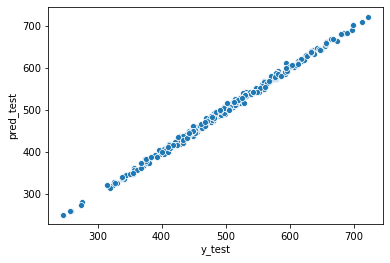

In [44]:
sns.scatterplot(x='y_test',y='pred_test',data=pred_df)

### evaluate your results by grabbing metrics (MAE, MSE, RMSE)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
# mae
mean_absolute_error(pred_df['y_test'],pred_df['pred_test'])

4.1019383755184

In [48]:
# compare mae to mean in original data
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [51]:
# mse
mse = mean_squared_error(pred_df['y_test'],pred_df['pred_test'])
mse

25.802355315730257

In [54]:
# rmse
mse**.5

5.0796018855546405

### how to predict the price of new gemstone with features: 998,1000

In [55]:
new_gem = [[998,1000]]

In [57]:
new_gem = scaler.transform(new_gem)
new_gem

array([[0.14117652, 0.53968792]])

In [58]:
model.predict(new_gem)

array([[420.33014]], dtype=float32)

### save, load then use this model

In [60]:
from tensorflow.keras.models import load_model
model.save('file1.h5')

In [61]:
file2 = load_model('file1.h5')

In [62]:
file2.predict(new_gem)

array([[420.33014]], dtype=float32)